In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score,classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


data pre-processing


In [ ]:
iris=df
encoder=OrdinalEncoder()
iris['Species']=encoder.fit_transform(df[['Species']])
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data visualisation for better understanding

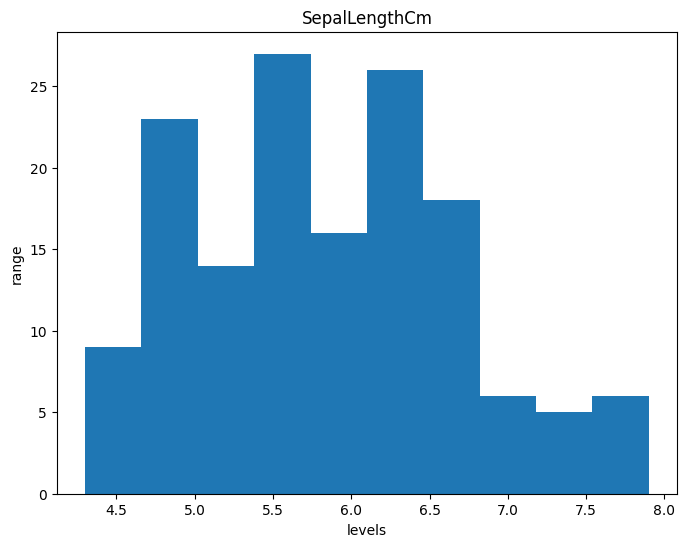

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['SepalLengthCm'],bins=10)
plt.xlabel('levels')
plt.ylabel('range')
plt.title('SepalLengthCm')
plt.show()

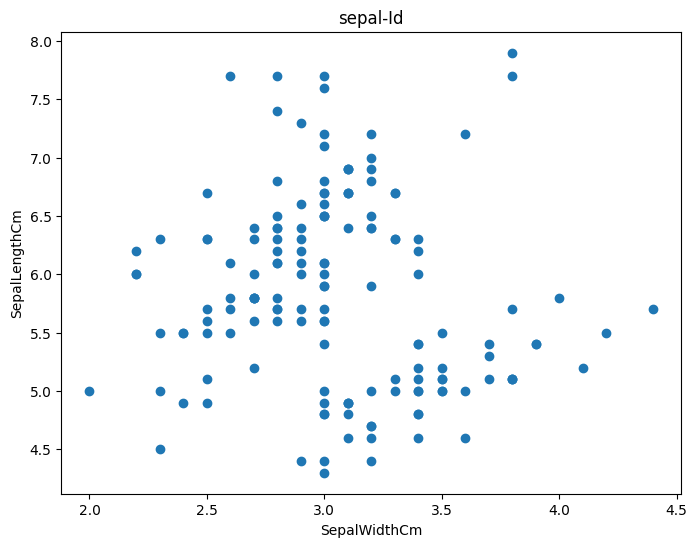

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['SepalWidthCm'],df['SepalLengthCm'])
plt.title('sepal-Id')
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()

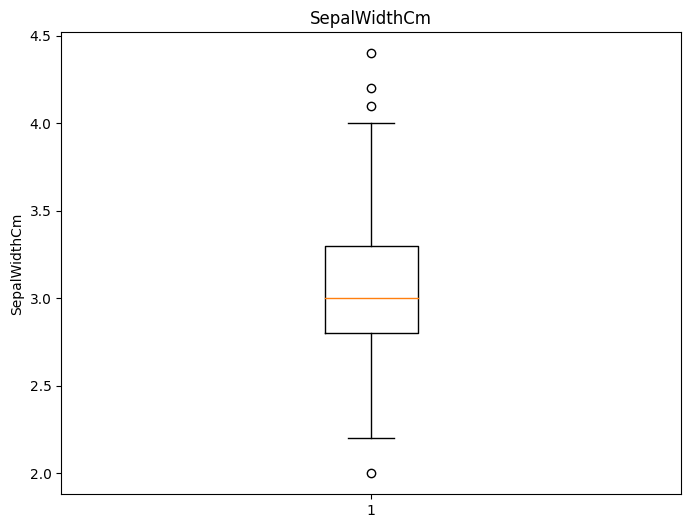

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(df['SepalWidthCm'])
plt.title('SepalWidthCm')
plt.ylabel('SepalWidthCm')
plt.show()

 K-means

In [ ]:
k_means=KMeans(n_clusters=3)
k_means.fit(iris)
res=k_means.predict([[0,5.9,3.0,5.1,1.8,0]])
print(res)
kmeans_labels = k_means.labels_
kmeans_score = silhouette_score(iris, kmeans_labels)
print('\n\nK-Means Silhouette Score:', kmeans_score)
print()
print()

[1]


K-Means Silhouette Score: 0.5824192661643913




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Hierarchical Clustering

In [ ]:
Z = linkage(iris, method='centroid')

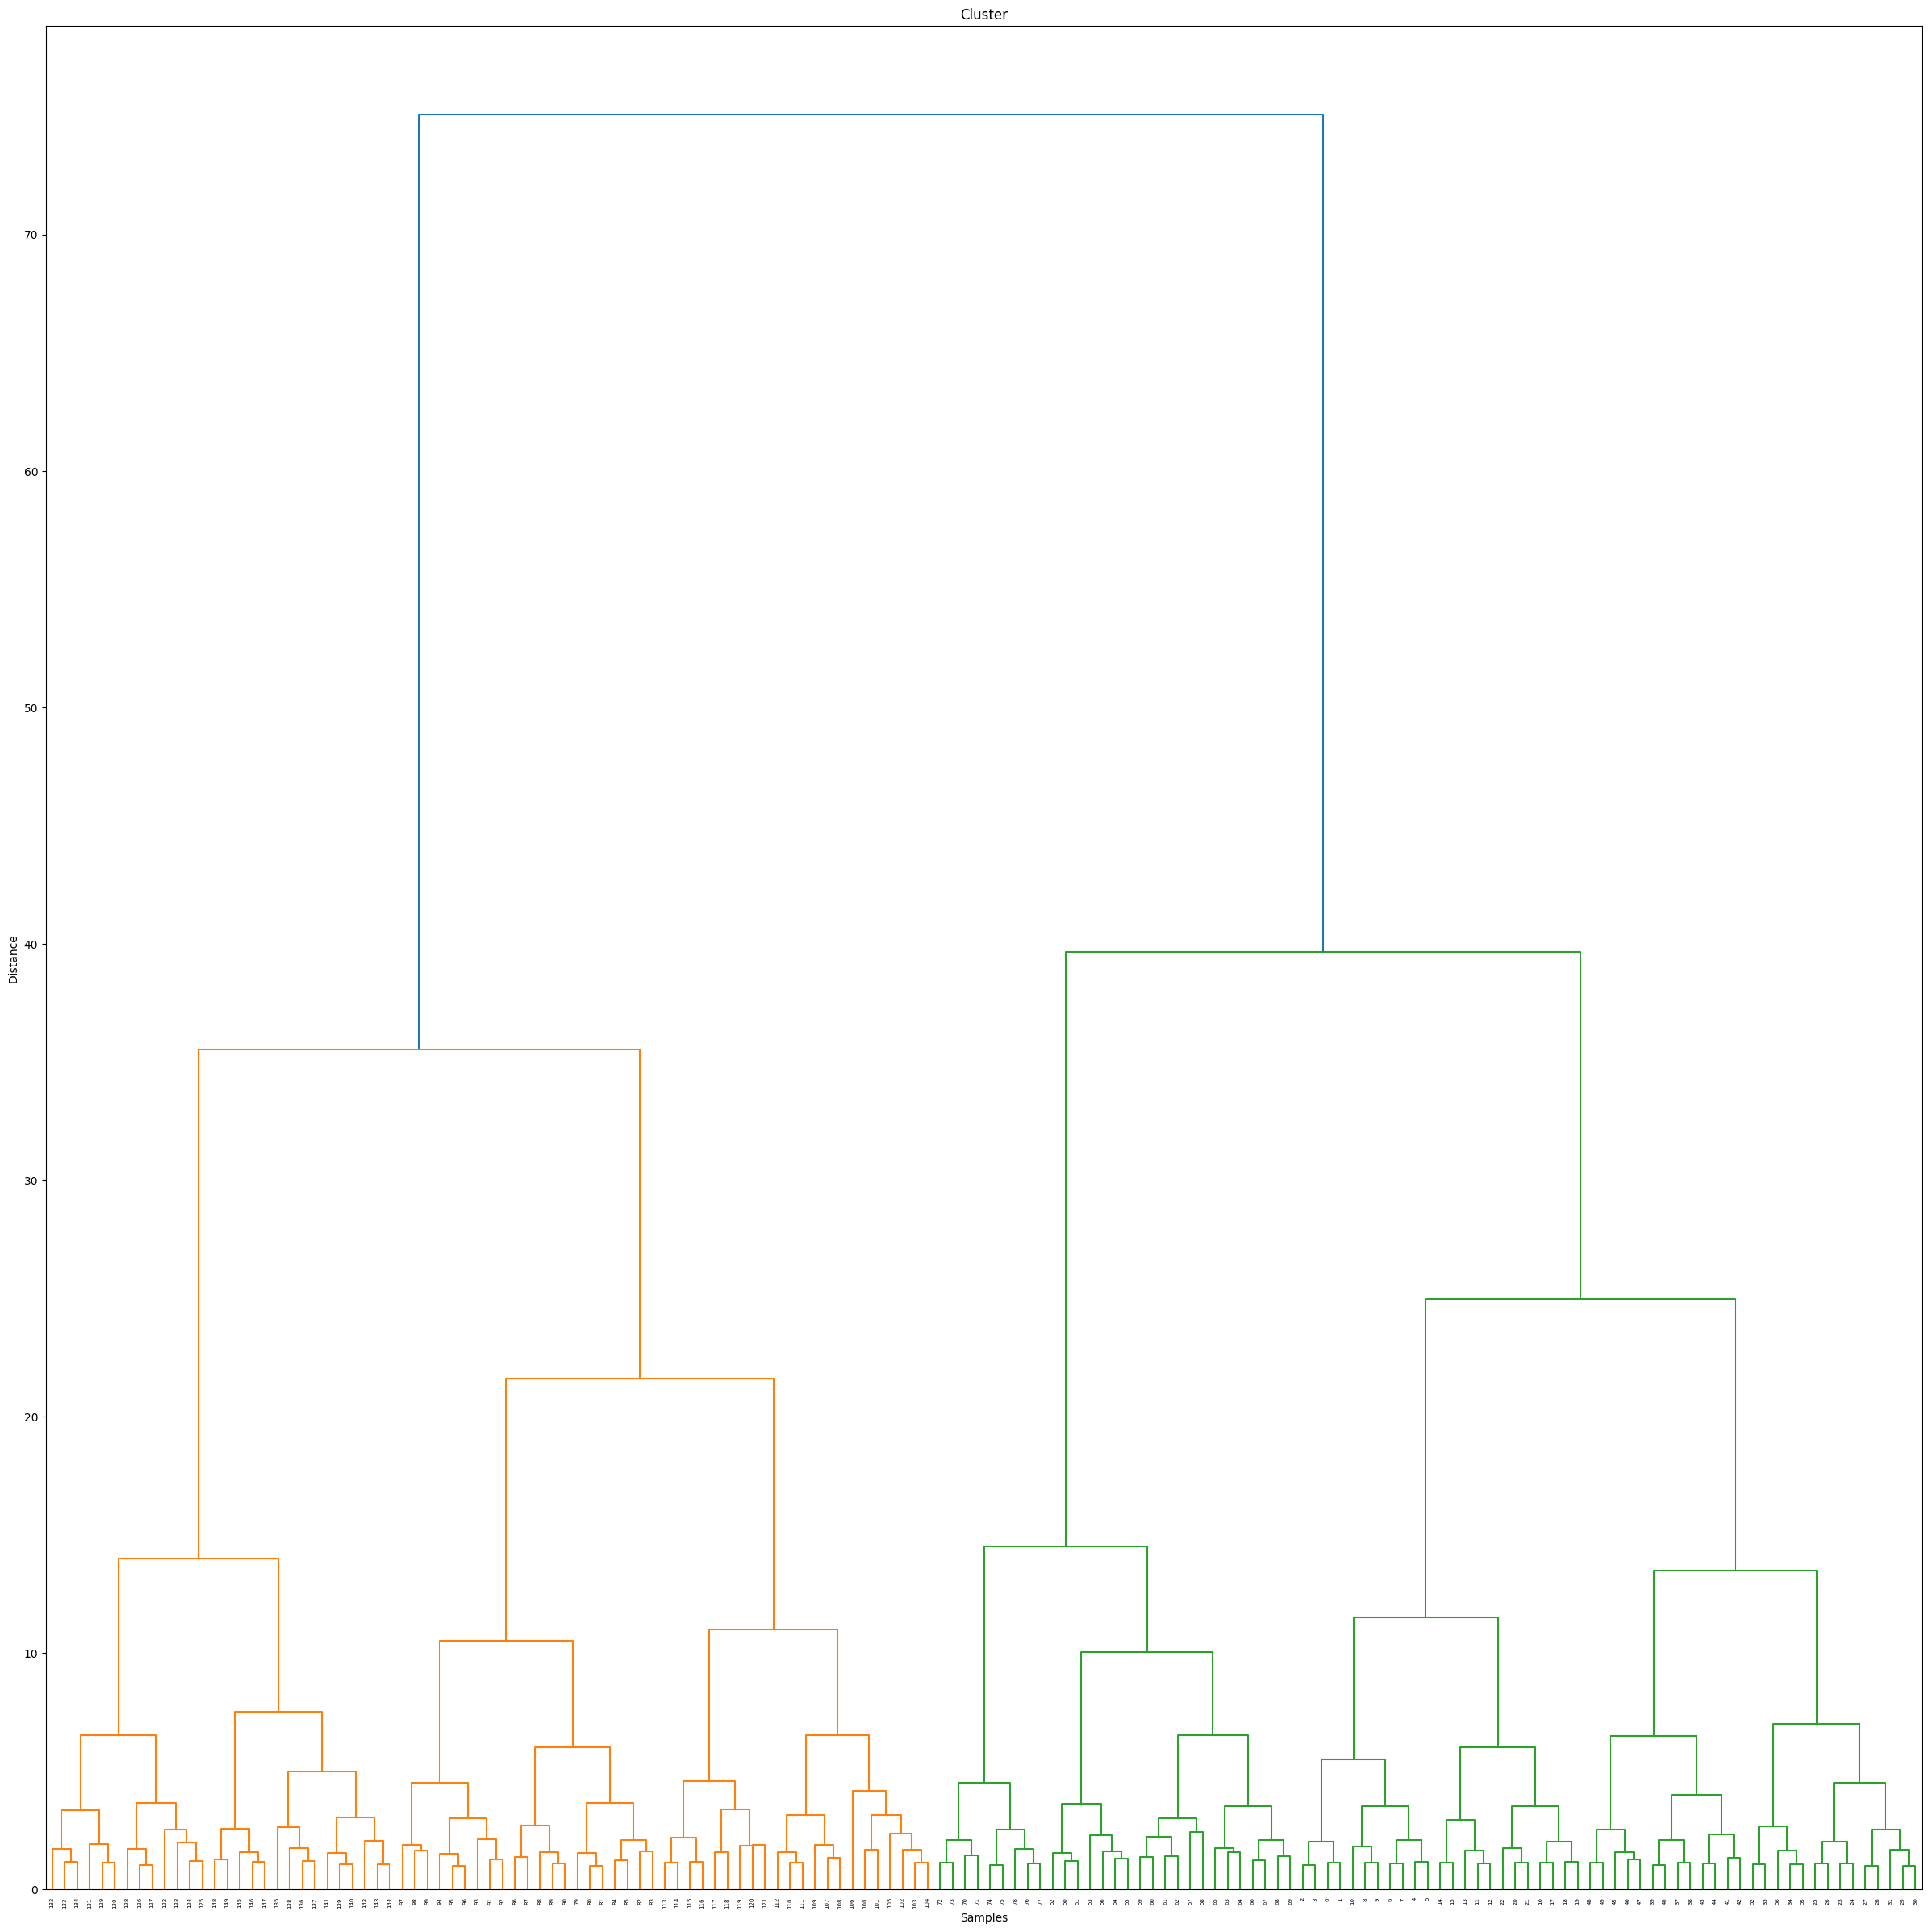

In [ ]:
plt.figure(figsize=(30, 30))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Cluster')
plt.show()

PCA

In [ ]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(iris)
pca_iris

PCA on Iris dataset. Plot and visualize results

In [ ]:
plt.scatter(pca_iris[:, 0], pca_iris[:, 1], c=iris['Species'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris ')
plt.show()